# Capstone-Project-aiml
## AIML Online Capstone - Pneumonia Detection Challenge
### Project Objectives
The objective of the project is,  Learn to how to do build an Object Detection Model  Use transfer learning to fine-tune a model.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## The Real Problem
### What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift. Pneumonia Detection Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

### Project Description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images:

Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

#### Pre-Processing, Data Visualization, EDA
 Exploring the given Data files, classes and images of different classes.  Dealing with missing values  Visualization of different classes  Analysis from the visualization of different classes.

#### Model Building
 Building a pneumonia detection model starting from basic CNN and then improving upon it.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

#### Test the Model, Fine-tuning and Repeat
 Test the model and report as per evaluation metrics  Try different models  Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them  Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Reference
Acknowledgment for the datasets. https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements

## Installing and importing the required libraries

In [1]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 9.2MB/s 


In [2]:
!pip install wandb

     |████████████████████████████████| 1.8MB 8.2MB/s 
     |████████████████████████████████| 133kB 54.5MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 174kB 61.1MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=166bb0e9c68825fb6190fa08487aedd4a88d6798245c7d43399a0d68cf8cb514
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=54b2c0e4a6e0f2ac3abf5f729e292fa9190aa1df02bbbf163bfd7e37f0f4db6c
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [3]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [4]:
!pip install tensorflow_addons

     |████████████████████████████████| 686kB 7.2MB/s 


In [5]:
tf.keras.__version__

'2.5.0'

In [6]:
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
import logging
import pandas as pd
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tqdm.notebook as tq
from copy import deepcopy
import glob
import datetime
import cv2
import pytz
import multiprocessing
import hashlib
from sklearn.utils import shuffle
import imgaug as ia
import imgaug.augmenters as iaa
import sys, math
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import importlib
import wandb
from wandb.keras import WandbCallback
from keras.callbacks import LambdaCallback
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD, Adam
import shutil
import pickle
from pydicom.pixel_data_handlers.util import apply_color_lut
from tensorflow_addons.optimizers import LAMB

%matplotlib inline 

In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## **Importing the data**

### 1) Mounting Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) Setting up kaggle to download datasets

- Please setup the kaggle_path where you have kept the kaggle.json file
- Or create the directory structure in your google drive like MyDrive/Colab/.kaggle/ and upload kaggle.json to this location

In [10]:
# Install kaggle to download the dataset
!pip install -q kaggle

In [11]:
# Ensure you have setup kaggle.json with the required API token and saved it to your google drive mounted above.
# Provide the location of the .kaggle/kagle.json file
kaggle_path = '/content/drive/MyDrive/Colab/.kaggle/'
os.chdir(kaggle_path)
#!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/Colab/.kaggle/

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

Kaggle API 1.5.4


In [12]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=fde03dcdd0bc8c547efef93b8561a1c0b78c105afdc62de2b54b45fb2f12b719
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [13]:
# Kaggle api version should be 1.5.12 or higher
!kaggle --version

Kaggle API 1.5.12


### 3) Download datasets from kaggle
- Please setup the destination path where you want to install the dataset
- Or create the directory structure as MyDrive/Colab/Capstone Project/ to store the datasets in your google drive

In [14]:
project_path = '/content/drive/MyDrive/Colab/CapstoneProject/'
os.chdir(project_path)
base_path = project_path + 'dataset'

if not os.path.exists(base_path):
    os.makedirs(base_path)

os.chdir(base_path)
data_path = os.path.join(base_path, 'data')
lib_path = os.path.join(base_path, 'libs')
# Downloading kaggle dataset from Pneumonia detection challenge
file_path = data_path + '/rsna-pneumonia-detection-challenge.zip'
if not os.path.exists(file_path):
  !kaggle competitions download -q -c rsna-pneumonia-detection-challenge

In [15]:
if not os.path.exists(os.path.join(data_path, 'checkpoint', 'maskrcnn')):
    os.makedirs(os.path.join(data_path, 'checkpoint', 'maskrcnn'))

if not os.path.exists(os.path.join(data_path, 'logs', 'maskrcnn')):
    os.makedirs(os.path.join(data_path, 'logs', 'maskrcnn'))

if not os.path.exists(os.path.join(data_path, 'runs', 'maskrcnn')):
    os.makedirs(os.path.join(data_path, 'runs', 'maskrcnn'))

Dataset is ready to be imported and to perform EDA

In [16]:
os.getcwd()

'/content/drive/MyDrive/Colab/CapstoneProject/dataset'

In [17]:
import zipfile
if not os.path.exists(data_path + '/' + 'stage_2_train_images'):
  zip_ref = zipfile.ZipFile(data_path + '/rsna-pneumonia-detection-challenge.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

### 4) Importing required libraries for training

In [18]:
#!git clone https://github.com/akTwelve/Mask_RCNN.git
#!git clone https://github.com/WittmannF/LRFinder.git
# !git clone https://github.com/psklight/keras_one_cycle_clr.git

In [19]:
sys.path.append(os.path.join(lib_path, 'keras_one_cycle_clr'))
import keras_one_cycle_clr as ktool

In [20]:
# Importing Mask RCNN model and required libraries
sys.path.append(os.path.join(lib_path, 'Mask_RCNN'))

import mrcnn.config as config
import mrcnn.model as modellib
from mrcnn import utils
from mrcnn import visualize
from mrcnn.model import log

In [21]:
sys.path.append(os.path.join(lib_path, 'LR_Finder'))
import lr_finder as lr_finder

## Exploratory Data Analysis

In [ ]:
# function to plot PDF
def plot_pdf(data,x_label,y_label,title):
    f,ax = plt.subplots(1,1, figsize=(7.5,4))
    sns.distplot(a=data, ax=ax)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# function to plot CDF
def plot_cdf(data,x_label,y_label,title):
    f,ax = plt.subplots(1,1, figsize=(7.5,4))
    counts, bin_edges = np.histogram(data.dropna(), bins=10, 
                                     density = True)
    pdf = counts/(sum(counts))#cal pdf
    cdf = np.cumsum(pdf)#cumulative sum of pdf,calculating cdf
    plt.plot(bin_edges[1:], cdf)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()
# function to plot box_plot    
def box_plot(data,col,title):
    f,ax = plt.subplots(1,1, figsize=(7.5,4))
    sns.boxplot(y=col, data=data,ax=ax)
    plt.title(title)
    plt.show()

### 1) Duplicate data detection
- Adding checksum while reading the images and labels

In [ ]:
# Checksum function to detect duplicate images
def md5Checksum(file):
  with open(data_path + '/' + 'stage_2_train_images' + '/' + file + '.dcm', "rb") as f:
    bytes = f.read()
    file_hash = hashlib.md5(bytes).hexdigest()
  return file_hash

In [ ]:
# 
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
det_class_info_df = pd.DataFrame()
if not os.path.exists(data_path + '/stage_2_detailed_class_info_updated.csv'):
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
  # Removing duplicates
  det_class_info_df=det_class_info_df.drop_duplicates().reset_index(drop=True)
  det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
  filelist= det_class_info_df['patientId'].to_numpy()
  # Checksum to identify duplicate images
  checksum=[]
  for file in filelist:
    checksum.append(md5Checksum(file))
  checksum = np.array(checksum)
  det_class_info_df['checksum'] = checksum
  det_class_info_df.to_csv(data_path + '/stage_2_detailed_class_info_updated.csv')
else:
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info_updated.csv', index_col=[0]) 

In [ ]:
merged_class_df = labels_df.merge(det_class_info_df[['patientId','class', 'checksum']], left_on='patientId', right_on='patientId', how='inner')

In [ ]:
merged_class_df.head()

patientId  ...                          checksum
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  78f614e5b22357018e0c50f08bddb412
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  ee3b52fc977cbf1e4c2210b29221e630
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...  0cdb347053dd580952be05667c20a593
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...  d016ec2dd9a89189afba8183c12a9e1e
4  00436515-870c-4b36-a041-de91049b9ab4  ...  12657f14d27e815bd3026c6ffdfbae3b

[5 rows x 8 columns]

Checking for duplicates

In [ ]:
print ('There are', det_class_info_df['checksum'].nunique(), 'checksum values')

There are 26684 checksum values


In [ ]:
print('There are', det_class_info_df['patientId'].nunique(), 'patients')

There are 26684 patients


Observation: There are no duplicates images.

### 2) Visualizing Class distributions

In [ ]:
merged_class_df[(merged_class_df['Target']==1)].groupby('patientId')['class'].count().max()

4

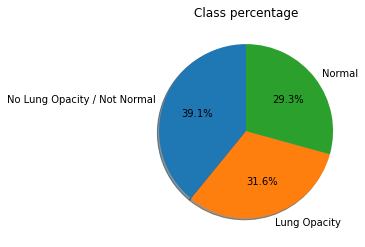

In [ ]:
class_info=merged_class_df["class"].value_counts()
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

### 3) Visualizing targets distribution

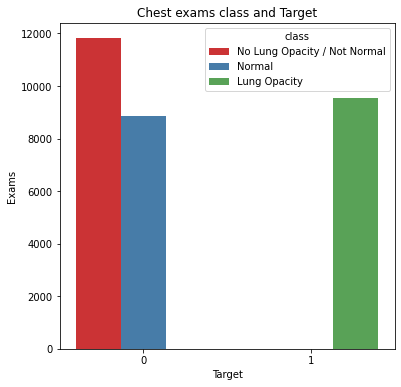

In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = merged_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set1')
plt.title("Chest exams class and Target")
plt.show()

### 4) Analyze DICOM file construct

In [ ]:
# Extract one image and process the DICOM information.
patientId = det_class_info_df.iloc[0]['patientId']
dicom_file_dataset = dcm.read_file(os.path.join(data_path, 'stage_2_train_images', patientId + '.dcm'))

In [ ]:
# Typical dataset metadata
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

### 5) Bounding Box Analysis

#### 5.1) Bounding Box X-Coordinates

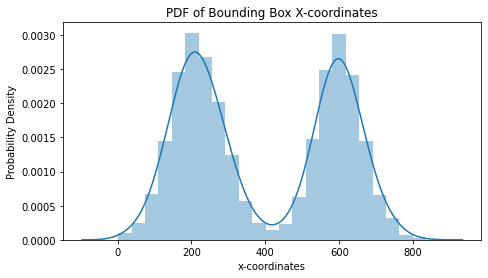

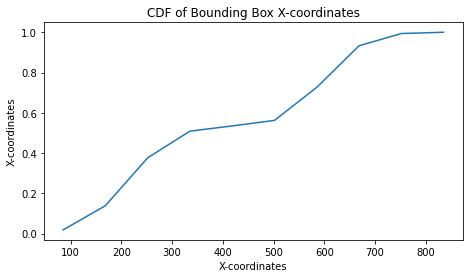

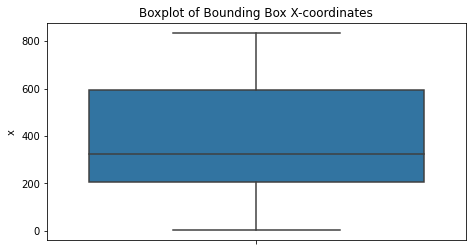

In [ ]:
plot_pdf(merged_class_df.x.values,'x-coordinates','Probability Density','PDF of Bounding Box X-coordinates')
plot_cdf(merged_class_df['x'],'X-coordinates','X-coordinates','CDF of Bounding Box X-coordinates')
box_plot(merged_class_df,'x','Boxplot of Bounding Box X-coordinates')

**Observation:**
1. The double-bell curve that we got in PDF of x-coordinates is due to the location of the lungs (as the opacity bounding boxes are on lungs only).
2. The x-coordinates passing over the lungs has high values in comparison to the area which do not have lungs.
3. The range that we got for x-coordinates is from 0 to 800.
4. Almost 99% of the x-coordinate values are less that 750.
5. The IQR(interquartile range) that we got is from 200 (25th percentile) & 600(75th percentile).
6. The median value that we got is 300(approx)

#### 5.2) Bounding Box Y-Coordinates

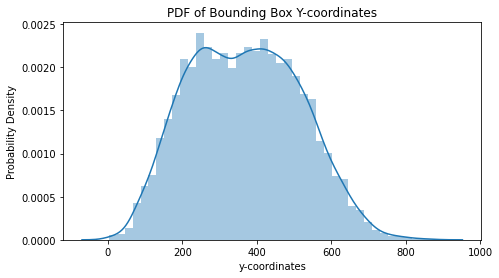

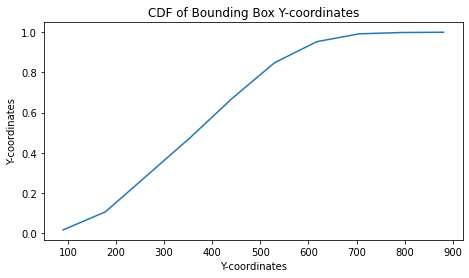

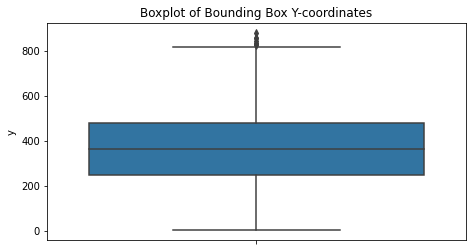

In [ ]:
plot_pdf(merged_class_df.y.values,'y-coordinates','Probability Density','PDF of Bounding Box Y-coordinates')
plot_cdf(merged_class_df['y'],'Y-coordinates','Y-coordinates','CDF of Bounding Box Y-coordinates')
box_plot(merged_class_df,'y','Boxplot of Bounding Box Y-coordinates')

**Observation:**
1. The decline that we can observe at the middle of the curve is due to the centre of the chest as there is no lungs at the centre (and bounding boxes are only on lungs).
2. The minimum & maximum value that we got is 0 and 800 respectively.
3. Almost 99% values are between 100 & 700.
4. The IQR(inerquartile range) we got is from 250 (25th percentile) & 500 (75th percentile).
5. The median value that we got is 350 (approx).
6. There are certain outlier values also above 800.

#### 5.3) Bounding Box Width

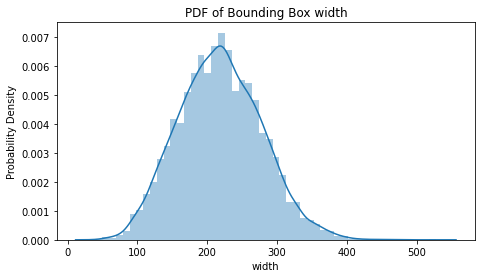

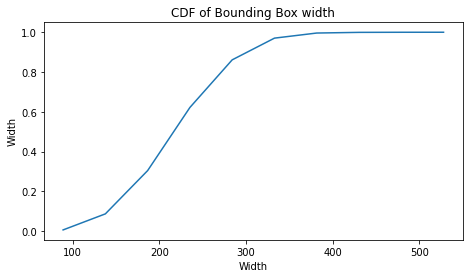

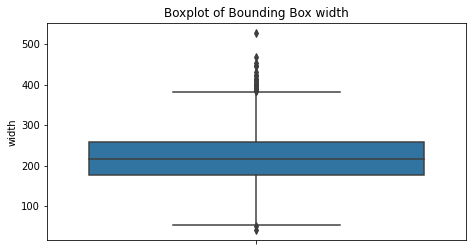

In [ ]:
plot_pdf(merged_class_df.width.values,'width','Probability Density','PDF of Bounding Box width')
plot_cdf(merged_class_df['width'],'Width','Width','CDF of Bounding Box width')
box_plot(merged_class_df,'width','Boxplot of Bounding Box width')

**Observation:**
1. The PDF of the bounding box width that we got is approx normally distributed.
2. The minimum & maximum values that we got is 50 & 400 with certain outliers above 400.
3. Almost 99% values are less than 350.
4. The IQR(interquartile range) that we got is from 175 to 275 respectively.
5. The median value that we got is 225 (approx).

#### 5.4) Bounding Box Height

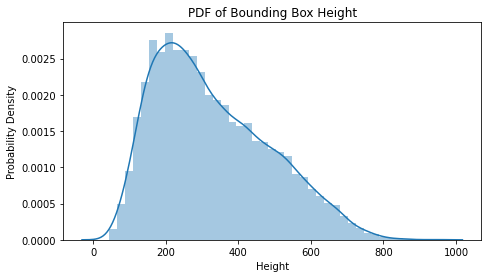

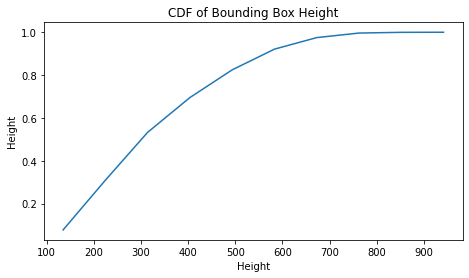

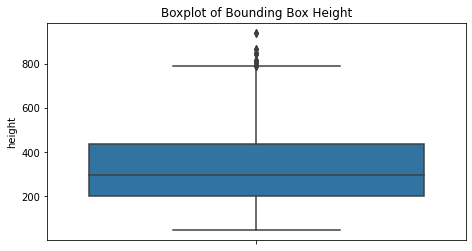

In [ ]:
plot_pdf(merged_class_df.height.values,'Height','Probability Density','PDF of Bounding Box Height')
plot_cdf(merged_class_df['height'],'Height','Height','CDF of Bounding Box Height')
box_plot(merged_class_df,'height','Boxplot of Bounding Box Height')

**Observation:**
1. The PDF of the bounding box height that we got is positively skewed.
2. The minimum & maximum values that we got is 0 & 800 with certain outliers above 800.
3. Almost 99% values are less than 700.
4. The IQR(interquartile range) that we got is from 200 to 450 respectively.
5. The median value that we got is 300 (approx).

#### 5.5) Bounding Box Area

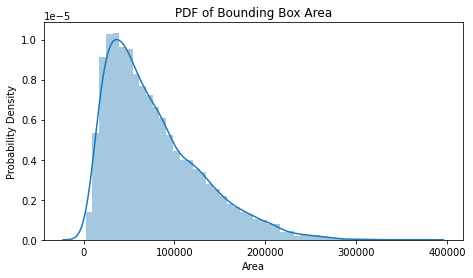

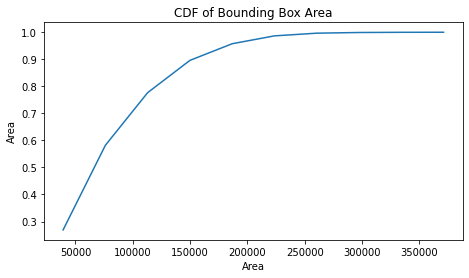

In [ ]:
plot_pdf(merged_class_df.width.values * merged_class_df.height.values,'Area','Probability Density','PDF of Bounding Box Area')
plot_cdf(merged_class_df['width'] * merged_class_df['height'],'Area','Area','CDF of Bounding Box Area')

**Observation:**
1. The PDF of the bounding box bounding-box area that we got is positively skewed.
2. The general minimum & maximum values that we got is 0 & 200000px (pixels) respectively.
3. Almost 99% values are less than 250000.
4. The IQR(interquartile range) that we got is from 25000 to 100000 respectively.
5. There are certain outliers above 200000.

#### 5.6) Bounding Box Aspect Ratio

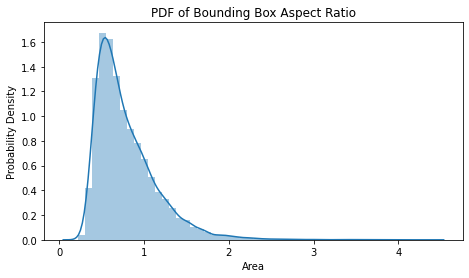

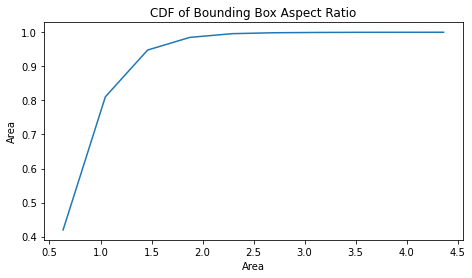

In [ ]:
plot_pdf(merged_class_df.width.values / merged_class_df.height.values,'Area','Probability Density','PDF of Bounding Box Aspect Ratio')
plot_cdf(merged_class_df['width'] / merged_class_df['height'],'Area','Area','CDF of Bounding Box Aspect Ratio')

**Observation:**
1. The PDF of the bounding box bounding-box area that we got is positively skewed.
2. The general minimum & maximum values that we got is 0 & 2 respectively.
3. Almost 99% values are less than 2.
4. There are certain outliers above 1.75.

#### 5.7) Bounding Box centroid

In [ ]:
centers = (merged_class_df.dropna(subset=['x'])
           .assign(center_x=merged_class_df.x + merged_class_df.width / 2, center_y=merged_class_df.y + merged_class_df.height / 2))

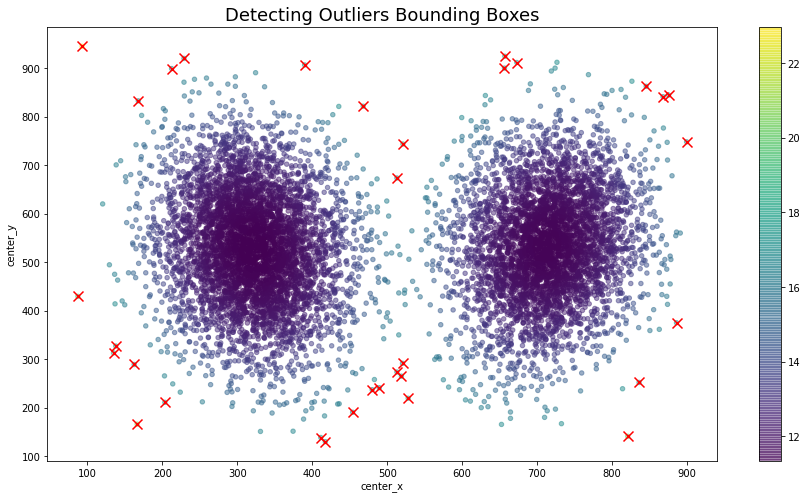

In [ ]:
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2)
clf.fit(centers[['center_x', 'center_y']])
center_probs = clf.predict_proba(centers[['center_x', 'center_y']])
Z = -clf.score_samples(centers[['center_x', 'center_y']])
outliers = centers.iloc[Z > 17]
fig, ax = plt.subplots(figsize=(15,8))
centers.plot.scatter('center_x', 'center_y', c=Z, alpha=0.5, cmap='viridis', ax=ax)
outliers.plot.scatter('center_x', 'center_y', c='red', marker='x', s=100, ax=ax)
_ = ax.set_title('Detecting Outliers Bounding Boxes', fontsize=18)

**Observation:**
1. We can observe that the central area of both the lungs are highly dense, having maximum numbers of bounding box centroids.
2. As soon as we are moving away from the centre, the bounding box density is gradually decreasing.
3. The red crosses that we can see on the outskerts of the lungs are outliers.
4. By removing those outlier values, we can get rid of the effect of outliers.

## Data Pre-processing

### 1) Filtering Dataset

In [ ]:
def filterPatientsByCriteria(criterion):
    x = 1
    for key in criterion.keys():
      if (x==1):
        filt_class_df = det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key)))
      else:
        filt_class_df=filt_class_df.append(det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key))))
      x = x + 1
    return filt_class_df

In [ ]:
# Function to generate list of augmentated dataframe
def generateAugmentationList(filt_class_df, augm_count):
  rowlist=[]
  augm_data=[]
  for i in range(augm_count):
    exists=True 
    while exists:
      n=random.randint(0,filt_class_df.shape[0]-1)
      if n in rowlist:
        exists=True
      else:
        rowlist.append(n)
        row = filt_class_df.iloc[n]
        augm_data.append(['xxx ' + row['patientId'], row['class'], row['Target'], 'aug'])
        exists=False
  filt_class_df=filt_class_df.append(pd.DataFrame(augm_data, 
               columns=[ 'patientId', 'class', 'Target', 'row_type']),
               ignore_index = True)
  return filt_class_df

In [ ]:
# Function to get filtered and augmented data based on given criterion and augmentation count
def get_filtered_data_criterion(criterion, aug_count):
  filt_class_df = pd.DataFrame()
  if not os.path.exists(data_path + '/' + 'filtered_data_aug.csv'):
    # Filter data based on the criterion
    filt_class_df = filterPatientsByCriteria(criterion)
    # Dropping the checksum from the filtered dataset as it is not relevant
    filt_class_df.drop(['checksum'], axis=1, inplace=True)
    # Add a new column with default value of 'orig'. The augmented row will have row_type = 'aug'
    filt_class_df['row_type'] = 'orig'
    # Append the augmented rows to the list
    filt_class_df=generateAugmentationList(filt_class_df, aug_count) # Augmenting 3000 images from the filtered list
    filt_class_df=shuffle(filt_class_df)
    filt_class_df.reset_index(drop=True)
    # Export the data to CSV
    filt_class_df.to_csv(data_path + '/' + 'filtered_data_aug.csv')
  else:
    filt_class_df = pd.read_csv(data_path + '/' + 'filtered_data_aug.csv')
  return filt_class_df

In [ ]:
# Setting up criterion to filter the data
# Set the criterion = {} to load all data
criterion={'Lung Opacity':3000, 
           'No Lung Opacity / Not Normal': 400, 
           'Normal': 400}

In [ ]:
# Get Filtered data
filt_class_df = pd.DataFrame()
filt_class_df =  get_filtered_data_criterion(criterion, 3000)

In [ ]:
filt_class_df.head()

Unnamed: 0                                 patientId  ... Target  row_type
0         743      1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76  ...      1      orig
1         699      66c52ba5-c91d-4f0c-af96-18148fd9dd66  ...      1      orig
2        4447  xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929  ...      0       aug
3         382      3862449a-cc8b-40da-91a0-a1437618e65c  ...      1      orig
4        3671      b4bd9d9f-9dee-47f0-a734-afbfb0e554cf  ...      0      orig

[5 rows x 5 columns]

In [ ]:
merged_class_df.head()

patientId  ...                          checksum
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  78f614e5b22357018e0c50f08bddb412
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  ee3b52fc977cbf1e4c2210b29221e630
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...  0cdb347053dd580952be05667c20a593
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...  d016ec2dd9a89189afba8183c12a9e1e
4  00436515-870c-4b36-a041-de91049b9ab4  ...  12657f14d27e815bd3026c6ffdfbae3b

[5 rows x 8 columns]

In [ ]:
# Function to filter the test images 
def filterTestPatientsByCriteria(criterion):
    x = 1
    # Create a list of patients that are not in training dataset
    delta_df = det_class_info_df[~det_class_info_df.patientId.isin(filt_class_df.patientId)]
    for key in criterion.keys():
      if (x==1):
        filt_test_class_df = delta_df[delta_df['class']==key].sample(int(criterion.get(key)))
      else:
        filt_test_class_df=filt_test_class_df.append(delta_df[delta_df['class']==key].sample(int(criterion.get(key))))
      x = x + 1
    return filt_test_class_df

In [ ]:
# Criteria for loading test data
criterion={'Lung Opacity':300, 
           'No Lung Opacity / Not Normal': 25, 
           'Normal': 25}

In [ ]:
# For the first time, filter the patient data based on given criteria
# Otehrwise Loading the filtered data from CSV if already saved on disk
filt_test_class_df = pd.DataFrame()
if not os.path.exists(data_path + '/' + 'filtered_test_data.csv'):
  filt_test_class_df =  filterTestPatientsByCriteria(criterion)
  filt_test_class_df.to_csv(data_path + '/' + 'filtered_test_data.csv')
else:
  filt_test_class_df = pd.read_csv(data_path + '/' + 'filtered_test_data.csv', index_col=[0])

In [ ]:
filt_test_class_df.reset_index(drop=True)

patientId  ...                          checksum
0    b3cbe758-859f-4ace-8968-4953ca48dfc7  ...  474c09e4986ecec79ae9ceb76c1b9c7d
1    9cf3c0e7-f25c-4358-b5a9-aca2e0b6f33e  ...  c5a4dd680862fecf5a31952edf6f697a
2    fff0b503-72a5-446a-843d-f3d152e39053  ...  2ecae1e26cacd4fed15d7d818f4958ba
3    e0cc9552-af6e-4b2e-8744-78689b0f2aaf  ...  40262a87f2c8484b7ef44c6718d645da
4    af335d18-feec-4942-9831-3e25ca20e7e3  ...  4eac80b41339e8233b88e61429a35532
..                                    ...  ...                               ...
345  8214be18-4b1c-4042-a3f9-c1929c516ffb  ...  78f529648b421ca121968d3bf3401e61
346  9213dc17-1267-42a4-a71d-546a4d994a4a  ...  6c69493495a1691fac282eb5204e8f86
347  9709cc26-3db4-4fc4-a026-2deb53cc5bda  ...  75c3db6bba4f099e41e6d3f2a3689e37
348  35ce8c4b-7dbc-49ae-b141-ee593aa2180e  ...  efb5fa60459d068262ab5b1b2a339cf5
349  aa8377bb-0c43-4c48-b185-bf96cc5c6537  ...  31c1073ec18e725862e8003903b24df8

[350 rows x 4 columns]

### 2) Image Augmentation

In [ ]:
def getBoundingBox(patientId, shape):
  bbs=[]
  for idx_a, row in merged_class_df[(merged_class_df['patientId']==patientId)].iterrows():
    bbs.append(BoundingBox(x1=row['x'], y1=row['y'], x2=row['x']+row['width'], y2=row['y']+row['height']))
  return BoundingBoxesOnImage(bbs, shape=shape)

In [ ]:
def getImage(patientId):
  dcm_img = dcm.read_file(data_path +'/' + 'stage_2_train_images' + '/' + patientId + '.dcm').pixel_array
  return dcm_img

In [ ]:
def augment(patientId, target):
  dcm_img = getImage(patientId)
  aug_bbs=None
  augmentation = iaa.Sequential([
      iaa.Fliplr(0.5),
      iaa.OneOf([ ## geometric transform
          iaa.Affine(
              scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
              translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
              rotate=(-2, 2),
              shear=(-1, 1),
          ),
          iaa.PiecewiseAffine(scale=(0.001, 0.025)),
      ]),
      iaa.OneOf([ ## brightness or contrast
          iaa.Multiply((0.9, 1.1)),
          iaa.ContrastNormalization((0.9, 1.1)),
      ]),
      iaa.OneOf([ ## blur or sharpen
          iaa.GaussianBlur(sigma=(0.0, 0.1)),
          iaa.Sharpen(alpha=(0.0, 0.1)),
      ])
  ], random_order=True)

  det = augmentation.to_deterministic()
  aug_image = det.augment_image(dcm_img)
  if target == 1:
    bbs = getBoundingBox(patientId, dcm_img.shape)
    aug_bbs = det.augment_bounding_boxes(bbs)
  return aug_image, aug_bbs

In [ ]:
def filter_augment_generator(merged_class_df):
  image_array=[]
  merge_aug_data=[]
  m = 0
  count = 200
  for idx, row in filt_class_df.iterrows():
    m += 1
    if row['row_type']=='orig':
      orig_img=getImage(row['patientId'])
      image_array.append(orig_img)
    else:
      aug_image, aug_bbs = augment(row['patientId'][4: :], row['Target'])
      image_array.append(aug_image)
      if row['Target']==1:
        for i in range(len(aug_bbs.bounding_boxes)):
          aug_bb = aug_bbs.bounding_boxes[i]
          x, y, width, height = aug_bb.x1, aug_bb.y1, aug_bb.x2-aug_bb.x1, aug_bb.y2-aug_bb.y1
          merge_aug_data.append([row['patientId'], x, y, width, height, row['Target'], row['class']])
      else:
        merge_aug_data.append([row['patientId'], np.nan, np.nan, np.nan, np.nan, row['Target'], row['class']])
    if m%count == 0:
      print (str(m))
  merged_class_df=merged_class_df.append(pd.DataFrame(merge_aug_data, 
              columns=[ 'patientId', 'x', 'y', 'width', 'height', 'Target', 'class']),
              ignore_index = True)
  return merged_class_df, np.array(image_array)

Load filtered & augmented Train images

In [ ]:
def load_filtered_augmented_images(merged_class_df):
  orig_aug_array=[]
  if not os.path.exists(data_path + '/' + 'filtered_image_array_aug_orig.npz'):
    merged_class_df, orig_aug_array = filter_and_augment(merged_class_df)
    np.savez_compressed(data_path + '/' + 'filtered_image_array_aug_orig.npz', images=orig_aug_array)
    merged_class_df.to_csv(data_path + '/' + 'merged_data_aug.csv')
  else:
    orig_aug_array = np.load(data_path + '/' + 'filtered_image_array_aug_orig.npz', allow_pickle=True)['images']
    if os.path.exists(data_path + '/' + 'merged_data_aug.csv'):
      merged_class_df = pd.read_csv(data_path + '/' + 'merged_data_aug.csv')
  return merged_class_df, orig_aug_array

In [ ]:
orig_aug_array=[]
merged_class_df, orig_aug_array = load_filtered_augmented_images(merged_class_df)

In [ ]:
orig_aug_array.shape

(6800, 1024, 1024)

In [ ]:
merged_class_df.tail()

Unnamed: 0  ... checksum
34643       34643  ...      NaN
34644       34644  ...      NaN
34645       34645  ...      NaN
34646       34646  ...      NaN
34647       34647  ...      NaN

[5 rows x 9 columns]

In [ ]:
merged_class_df["patientId"]= merged_class_df["patientId"].str.replace("xxx ", "xxx_", case = True)
filt_class_df["patientId"]= filt_class_df["patientId"].str.replace("xxx ", "xxx_", case = True)
filt_test_class_df["patientId"]= filt_test_class_df["patientId"].str.replace("xxx ", "xxx_", case = True)

Load filtered & augmented Test Images

In [ ]:
def loadTestImages():
  test_image_array=[]
  for idx, row in filt_test_class_df.iterrows():
    test_image_array.append(getImage(row['patientId']))
  return np.array(test_image_array)

In [ ]:
test_orig_array=[]
if not os.path.exists(data_path + '/' + 'filtered_image_test_orig.npz'):
  test_orig_array=loadTestImages()
  np.savez_compressed(data_path + '/' + 'filtered_image_test_orig.npz', images=test_orig_array)
else:
  test_orig_array = np.load(data_path + '/' + 'filtered_image_test_orig.npz', allow_pickle=True)['images']

In [ ]:
test_orig_array.shape

(350, 1024, 1024)

### 3) Resize Images
- Resize images to a smaller size to ensure the model training doesn't use up all the RAM

In [ ]:
orig_img_size=1024
do_not_resize=True
target_img_size=256
target_mask_size=int(target_img_size/2)

In [ ]:
def resizeMask(idx, imgShape):
  res_mask=np.zeros(imgShape)
  patientId = filt_class_df.iloc[idx]['patientId']
  for idx_a, row_a in merged_class_df[(merged_class_df['patientId']==patientId) & (merged_class_df['Target']==1)].iterrows():
    res_mask[int(row_a['y']):int(row_a['y'])+ int(row_a['height']), 
        int(row_a['x']): int(row_a['x']) + int(row_a['width'])] = 1
  res_mask = resize(res_mask, (target_mask_size, target_mask_size), mode='symmetric')
  return res_mask

In [ ]:
# Convert each file
def resizeImage(idx):
    try:
        res_array = resize(orig_aug_array[idx], (target_img_size, target_img_size), mode='symmetric')
    except Exception as e:
        print(file)
        print(e)
    return res_array

In [ ]:
# Convert all files within a folder
IST=pytz.timezone('Asia/Kolkata')
def resizeImages():
    res_array=[]
    cnt=filt_class_df.shape[0]
    print('Resizing', str(cnt), 'files from size - 1024x1024 to', str(target_img_size) + 'x' + str(target_img_size))
    print ('-----------------------------------------------------')
    current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
    print("Start Time =", current_time)
    for idx in range(cnt):
      ia = resizeImage(idx)
      res_array.append(ia)
    current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
    print("End Time =", current_time)
    return np.array(res_array)    

In [ ]:
#Loading resized image array. 
#If pneumonia_data_orig_aug_res_<>.npz doesn't exist, then resize first and save it 
def load_image():
  resized_array=[]
  if not os.path.exists(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz'):
    resized_array = resizeImages()
    np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz', images=resized_array)
  else:
    resized_array = np.load(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz', allow_pickle=True)['images']
  return resized_array

In [ ]:
resized_array=[]
if do_not_resize:
  resized_array=orig_aug_array
else:
  resized_array = load_image()
  del orig_aug_array

In [ ]:
print(resized_array.shape)

(6800, 1024, 1024)


Resize test images

In [ ]:
def load_test_images():
  resized_test_array=[]
  if not os.path.exists(data_path + '/' + 'pneumonia_data_orig_test_' + str(target_img_size) + '.npz'):
    cnt=filt_test_class_df.shape[0]
    for idx in range(cnt):
      ia = resize(test_orig_array[idx], (target_img_size, target_img_size), mode='symmetric')
      resized_test_array.append(ia)
    np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_test_' + str(target_img_size) + '.npz', images=resized_test_array)
  else:
    resized_test_array = np.load(data_path + '/' + 'pneumonia_data_orig_test_' + str(target_img_size) + '.npz', allow_pickle=True)['images']
  return np.array(resized_test_array)

In [ ]:
if do_not_resize:
  resized_test_array=test_orig_array
else:
  resized_test_array=load_test_images()
  del test_orig_array

In [ ]:
print(resized_test_array.shape)

(350, 1024, 1024)


### 3) Visualize Images after pre-processing

Defining function for plotting images

In [ ]:
# This function is to validate the JPG display against the original
def plot_dcm_images(ax, patientId, c, bb_box=False):
  dcm_data = dcm.read_file(data_path +'/' + 'stage_2_train_images/' + patientId + '.dcm')
  ax[c//3, c%3].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                                        width=row['width'],height=row['height'],
                                        linewidth=1, edgecolor='r', facecolor='none'))

In [ ]:
# Pass bb_box as True for target 1 to draw bounding boxes
def plot_images(ax, patientId, c, bb_box=False, col=3):
  idx=np.where(filt_class_df['patientId']==patientId)
  if do_not_resize:
    target_img_size = orig_img_size
  scale=target_img_size/orig_img_size
  ax[c//col, c%col].imshow(resized_array[idx].reshape(target_img_size, target_img_size), cmap=plt.cm.bone)
  ax[c//col, c%col].set_title('ID: {}\n'.format(patientId))
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      ax[c//col, c%col].add_patch(Rectangle(xy=(row['x']*scale, row['y']*scale),
                 width=row['width']*scale,height=row['height']*scale,
                 linewidth=2, edgecolor="white",fill=False))

##### Plot images with bounding boxes of subjects that were detected with Pneumonia

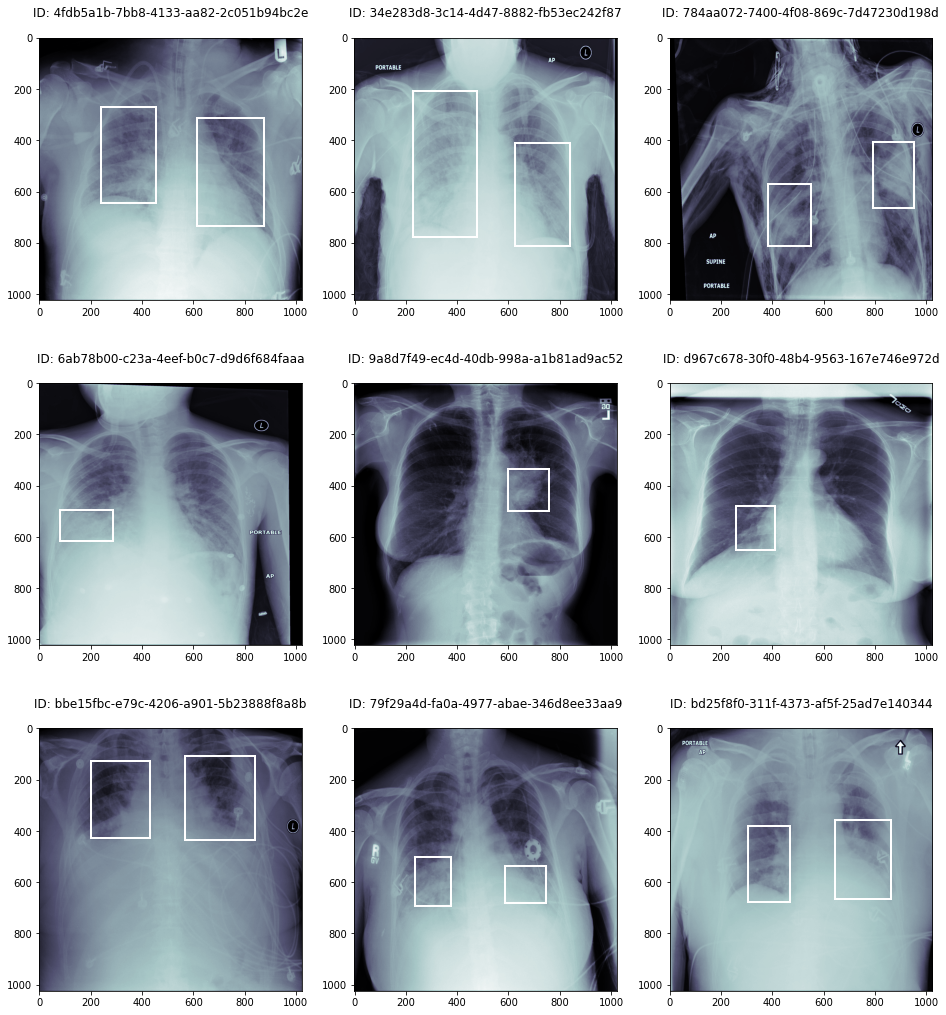

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids=[]
# Target = 1
#for patientId in filt_class_df[(filt_class_df['Target']==1) & (filt_class_df['patientId'].str.startswith('xxx_')==False)].patientId.sample(9):
for patientId in filt_class_df[(filt_class_df['Target']==1) & (filt_class_df['row_type']=='orig')].patientId.sample(9):
  image_ids.append(patientId)
  plot_images (ax, patientId, c, True)
  c = c + 1

##### Plot original DCM images

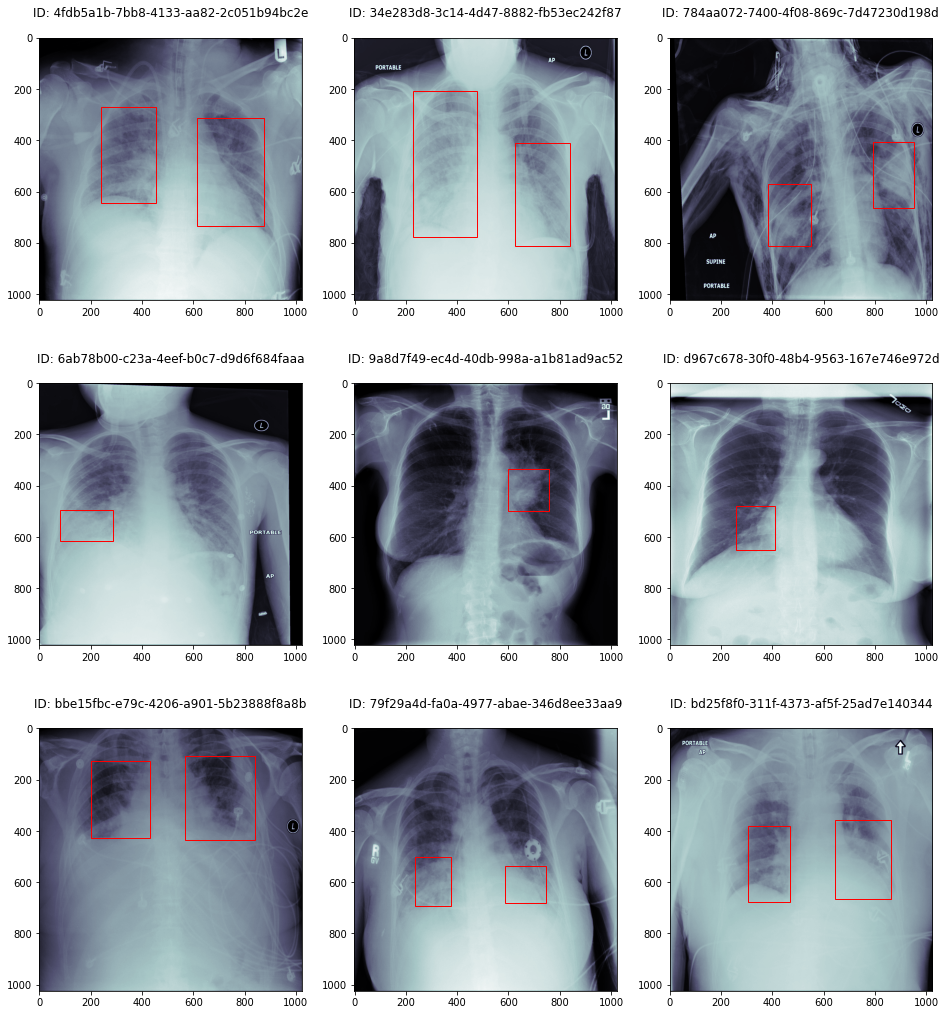

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Target = 1
for patientId in image_ids:
  plot_dcm_images (ax, patientId, c, True)
  c = c + 1

##### Plot images of subjects with no Pneumonia

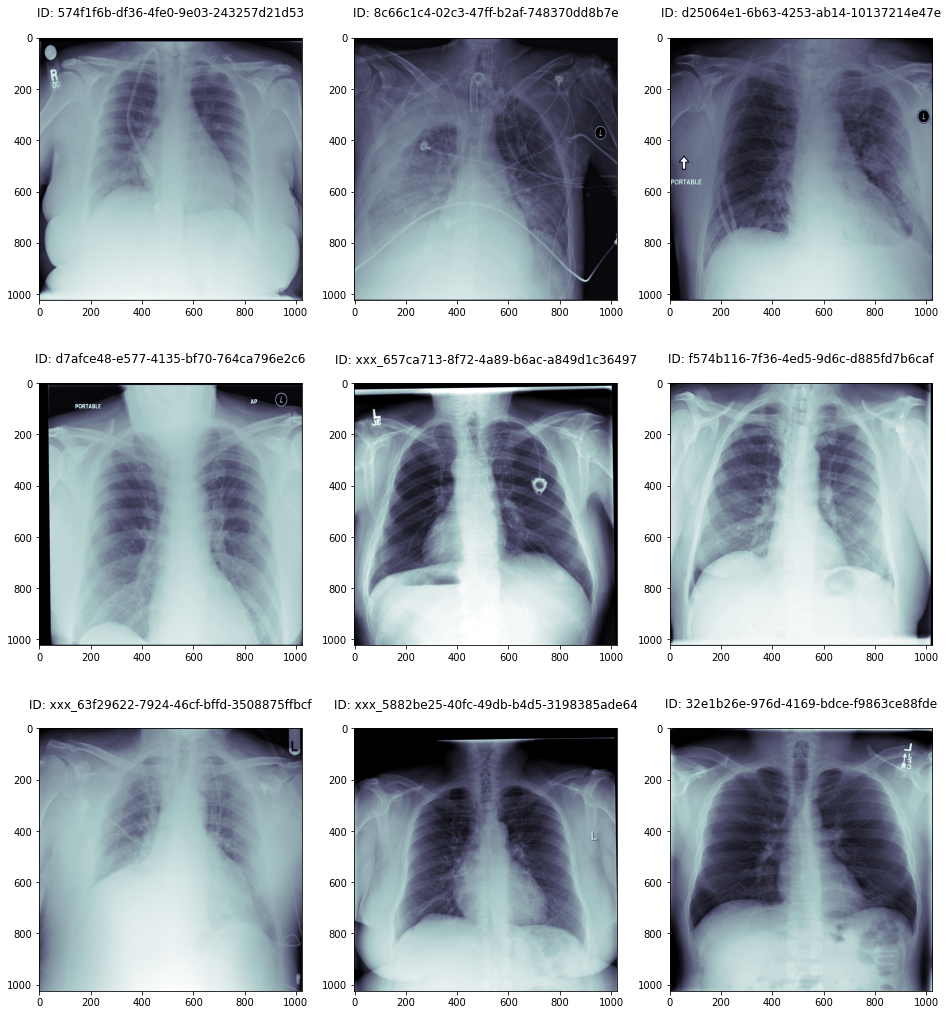

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids1=[]
# Target = 0
for patientId in filt_class_df[(filt_class_df['Target']==0) & (filt_class_df['patientId'].str.startswith('xxx ')==False)].patientId.sample(9):
  image_ids1.append(patientId)
  plot_images (ax, patientId, c, False)
  c = c + 1

##### Plot augmented images side by side with original

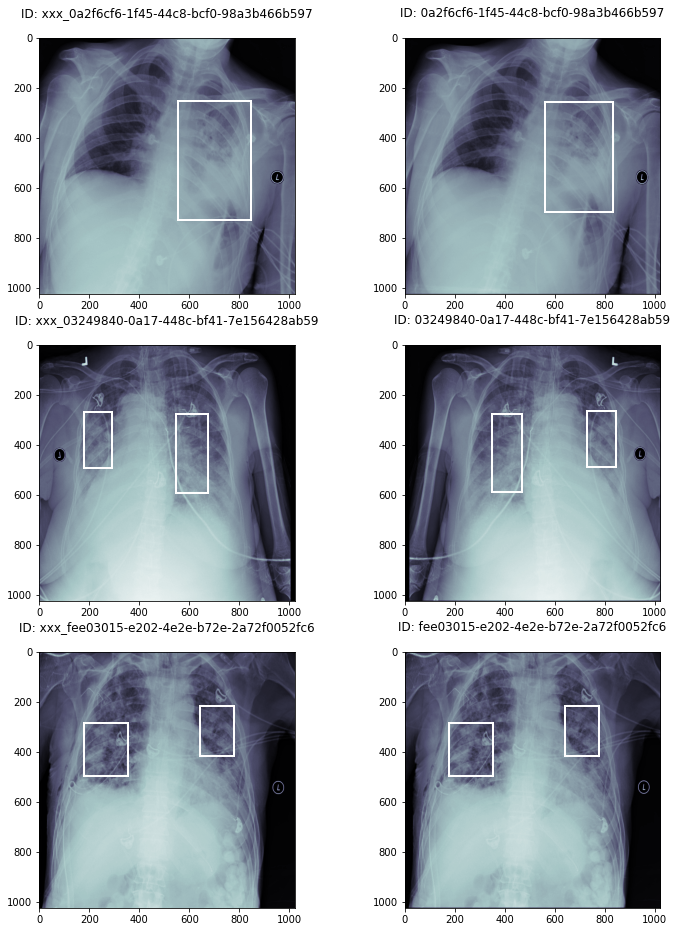

In [ ]:
c = 0
f, ax = plt.subplots(3,2, figsize=(12,16))
#for patientId in filt_class_df[(filt_class_df['Target']==1) & (filt_class_df['patientId'].str.startswith('xxx ')==True)].patientId.sample(3):
for patientId in filt_class_df[(filt_class_df['Target']==1) & (filt_class_df['row_type']=='aug')].patientId.sample(3):
  plot_images (ax, patientId, c, True, 2)
  c = c + 1
  patientId = patientId[4::]
  plot_images (ax, patientId, c, True, 2)
  c = c + 1  

##### Plot masks for subjects with Pneumonia

In [ ]:
def getMask(patientId, imgShape):
  image_mask=np.zeros(imgShape)
  if do_not_resize:
    target_mask_size=orig_img_size
  for idx_a, row_a in merged_class_df[(merged_class_df['patientId']==patientId) & (merged_class_df['Target']==1)].iterrows():
    image_mask[int(row_a['y']):int(row_a['y'])+ int(row_a['height']), 
        int(row_a['x']): int(row_a['x']) + int(row_a['width'])] = 1
  image_mask = resize(image_mask, (target_mask_size, target_mask_size), mode='symmetric')
  return image_mask

In [ ]:
# Pass bb_box as True for target 1 to draw bounding boxes
def plot_masks(filt_df, ax, patientId, c, bb_box=False):
  idx=np.where(filt_df['patientId']==patientId)
  ax[c//3, c%3].imshow(getMask(patientId, (1024, 1024)))
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))

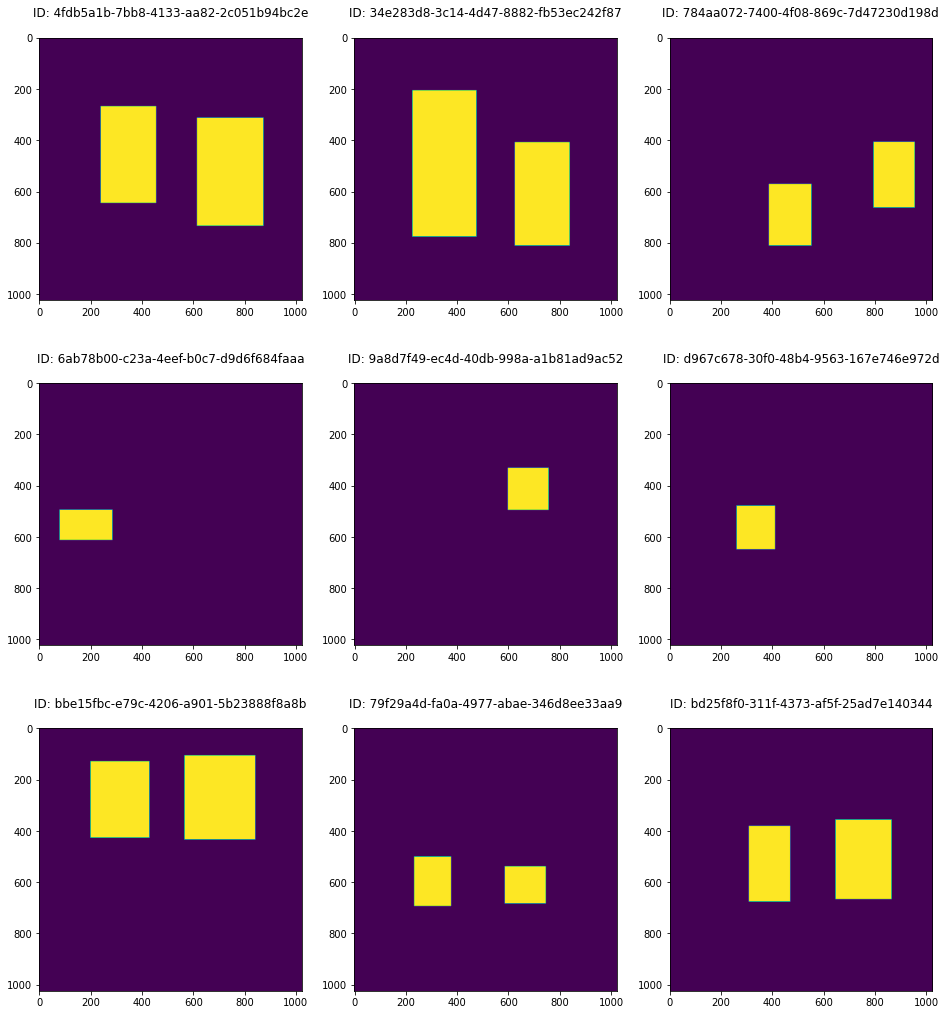

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Target = 1
for patientId in image_ids:
  plot_masks (filt_class_df, ax, patientId, c, True)
  c = c + 1

## Model Training & Evaluation

### 1) Base classes

In [ ]:
ROOT_DIR=data_path
import sys, math
sys.path.append(os.path.join(lib_path, 'Mask_RCNN'))

In [ ]:
class MaskRCnnConfig(config.Config):
    NAME = 'MaskRCNN'
    TRAINING_WEIGHTS=lib_path + '/' + 'Mask_RCNN' + '/' + 'mask_rcnn_coco.h5'
    TESTING_WEIGHTS=''
    BACKBONE = 'resnet50'
    NUM_CLASSES = 2
    IMAGES_PER_GPU=2
    ORIG_IMAGE_SHAPE=(1024, 1024)
    OPTIMIZER='SGD'
#    MASK_SHAPE=(28, 28)
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    MEAN_PIXEL=[126.7,71.5,130.5]
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 4
    DETECTION_MIN_CONFIDENCE = 0.78
    DETECTION_NMS_THRESHOLD = 0.01
    STEPS_PER_EPOCH = 100
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    VALIDATION_STEPS=50
    USE_MINI_MASK=True

In [ ]:
class InferenceConfig(MaskRCnnConfig):
    GPU_COUNT = 1
    USE_MINI_MASK=False
    IMAGES_PER_GPU = 1

In [ ]:
class MaskDataset(utils.Dataset):
    def __init__(self, image_fps, image_annotations, config, image_array):
        super().__init__(self)
        # Add classes
        self.config=config
        self.image_array=image_array
        self.image_annotations = image_annotations
        self.add_class('pneumonia', 1, 'Lung Opacity')
        
        # add images 
        for i, patiendId in enumerate(image_fps):
            annotations = self.image_annotations[patiendId]
            self.add_image('pneumonia', image_id=i, annotations=annotations, image_height=self.config.ORIG_IMAGE_SHAPE[0], image_width=self.config.ORIG_IMAGE_SHAPE[1])

    def add_image(self, source, image_id, **kwargs):
        image_info = {
            "id": image_id,
            "source": source,
        }
        image_info.update(kwargs)
        self.image_info.append(image_info)

    def load_image(self, image_id):
        image = self.image_array[image_id]
#        image = apply_color_lut(image, palette='PET')
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['image_height'], info['image_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['image_height'], info['image_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

### 2) Define Mask RCNN Model & Functions

In [ ]:
# Dictionary of results keyed by id.
model_results={}
# Training models keyed by id.
model_list={}
# Track epoch
epoch_list={}
# Iteration Id - Maps the static to dynamic id used for training and tracking
iteration_list={}
#history
history_list={}

In [ ]:
def get_log_dir(static_id):
  return data_path + '/' + 'logs/maskrcnn' + '/' + iteration_list[static_id] + '/'

In [ ]:
def get_checkpoint_weight_dir(static_id):
  return data_path + '/' + 'checkpoint/maskrcnn' + '/' + iteration_list[static_id] + '/'

In [ ]:
def get_checkpoint_weight_path(static_id, epochid):
  return get_checkpoint_weight_dir(static_id) + 'maskrcnn_' + str(epochid).zfill(4) + '.h5'

In [ ]:
def clear_runs(static_id, dir=False):
  if static_id in iteration_list:
    id = iteration_list[static_id]
    if id in model_list:
      model_list.pop(iteration_list[static_id])
    if id in epoch_list:
      epoch_list.pop(iteration_list[static_id])
    if id in model_results:
      model_results.pop(iteration_list[static_id])
    if dir:
      shutil.rmtree(get_log_dir(static_id))
      shutil.rmtree(get_checkpoint_weight_dir(static_id))
    if static_id in iteration_list:
      iteration_list.pop(static_id)
  tf.keras.backend.clear_session()

In [ ]:
def get_patient_list(data_df):
  return data_df['patientId'].tolist()

In [ ]:
def parse_dataset(labels, data_df): 
  image_annotations={}
  image_list = get_patient_list(data_df)
  image_annotations = {p: [] for p in image_list}
  for patientId in image_list:
    for index, row in merged_class_df[merged_class_df['patientId']==patientId][['x', 'y', 'width', 'height', 'Target']].iterrows(): 
      image_annotations[patientId].append(row)
  return image_list, image_annotations 

In [ ]:
def reset_weights(id, model, weights_path):
  model.load_weights(id, weights_path, by_name=True, exclude=["mrcnn_class_logits", 
                                                          "mrcnn_bbox_fc", 
                                                          "mrcnn_bbox", 
                                                          "mrcnn_mask"])
  return model

In [ ]:
def create_maskmodel(id, config):
  model = modellib.MaskRCNN(id=id, mode='training', config=config, model_dir=ROOT_DIR)
  weights_path = mask_config.TRAINING_WEIGHTS
  # Exclude the last layers because they require a matching
  # number of classes
  model.load_weights(id, weights_path, by_name=True, exclude=["mrcnn_class_logits", 
                                                              "mrcnn_bbox_fc",
                                                              "mrcnn_bbox",
                                                              "mrcnn_mask"])
  return model

In [ ]:
def create_inference_maskmodel(static_id, config):
  if static_id in iteration_list:
    id = iteration_list[static_id]
    model_path = config.TESTING_WEIGHTS
    model = modellib.MaskRCNN(id=id,
                              mode='inference', 
                              config=config,
                              model_dir=ROOT_DIR)
    model.load_weights(id, model_path, by_name=True)
    return model

In [ ]:
def get_best_epoch(static_id, metric, type="min"):
  id = iteration_list[static_id]
  if type=="min":
    return model_results[id][model_results[id][metric]==model_results[id][metric].min()]
  else:
    return model_results[id][model_results[id][metric]==model_results[id][metric].max()]

In [ ]:
def plot_graph(data, ):
  plt.figure(figsize=(22,5))
  plt.subplot(131)
  plt.plot(data.index, data["loss"], label="Train loss")
  plt.plot(data.index, data["val_loss"], label="Valid loss")
  plt.legend()
  plt.subplot(132)
  plt.plot(data.index, data["mrcnn_class_loss"], label="Train class loss")
  plt.plot(data.index, data["val_mrcnn_class_loss"], label="Valid class loss")
  plt.legend()
  plt.subplot(133)
  plt.plot(data.index, data["mrcnn_bbox_loss"], label="Train box loss")
  plt.plot(data.index, data["val_mrcnn_bbox_loss"], label="Valid box loss")
  plt.legend()
  plt.show()

In [ ]:
def plot_loss_graph(static_id):
  plt.figure(figsize=(22,5))
  id = iteration_list[static_id]
  plot_graph(model_results[id])

In [ ]:
def initialize_wandb(name, config):
  config_dict = mask_config.to_dict()
  coi = ['BACKBONE', 'LEARNING_MOMENTUM', 'LEARNING_RATE',
          'WEIGHT_DECAY', 'STEPS_PER_EPOCH', 'OPTIMIZER', 'LAYERS']
  run = wandb.init(name=name, 
                   project="Capstone AIML",
                   config=({k: config_dict[k] for k in coi})
                   )
  return run

In [ ]:
def add_iteration(static_id, iteration_id):
  iteration_list[static_id]=iteration_id

In [ ]:
def get_iteration_id(static_id):
  def generate_id(static_id):
    now = datetime.datetime.now()
    return str(static_id) +"_{:%Y%m%dT%H%M}".format(now)
  if static_id in iteration_list:
    iteration_id=iteration_list[static_id]
  else:
    iteration_id = generate_id(static_id)
    iteration_list[static_id] = iteration_id
  print('Iteration Id:',iteration_id)
  return iteration_id

In [ ]:
def get_nn_model(static_id, config, optimizer):
  global model_list, data_path
  id = iteration_list[static_id]
  if id in model_list:
    model=model_list[id]
    weights_path = config.TRAINING_WEIGHTS
    model = reset_weights(id, model, weights_path)  
    return model
  else:
    model=create_maskmodel(id, config)
    model.construct(learning_rate=config.LEARNING_RATE, layers=config.LAYERS, optim=optimizer)
    model_list[id]=model
    model=model_list[id]
    return model

In [ ]:
def add_model_results(static_id):
  id = iteration_list[static_id]
  if id in history_list:
    hist_list = history_list[id]
    i = 0
    model_result = pd.DataFrame()
    for hist in hist_list:
      result = pd.DataFrame(hist)
      model_result = model_result.append(result, ignore_index=True)
    model_results[id]=model_result

In [ ]:
def add_best_epoch_to_list(static_id, metric, type):
  id = iteration_list[static_id]
  best_epoch = get_best_epoch(static_id, metric, type)
  epoch_list[id]=best_epoch.index[0]

In [ ]:
def add_history_to_list(static_id, history):
  id = iteration_list[static_id]
  if id in history_list:
    hist_obj = history_list[id]
    hist_obj.append(history)
    history_list[id] = hist_obj
  else:
    history_list[id] = [history]

In [ ]:
def save_run_state(run_id, static_id):
  run_path = data_path + '/' + 'runs/maskrcnn/' + str(run_id)
  with open(os.path.join(run_path, static_id + '_iteration_list.pkl'), 'wb') as iter_list_file:
    pickle.dump(iteration_list, iter_list_file)
  with open(os.path.join(run_path, static_id + '_history_list.pkl'), 'wb') as history_list_file:
    pickle.dump(history_list, history_list_file)
  with open(os.path.join(run_path, static_id + '_model_results.pkl'), 'wb') as model_results_file:
    pickle.dump(model_results, model_results_file)
  with open(os.path.join(run_path, static_id + '_epoch_list.pkl'), 'wb') as epoch_list_file:
    pickle.dump(epoch_list, epoch_list_file)

In [ ]:
def load_state(run_id, static_id):
  global iteration_list, model_list, history_list, model_results, epoch_list, ITERATION_MASTER_LIST
  run_path = data_path + '/' + 'runs/maskrcnn/' + str(run_id)
  if os.path.exists(os.path.join(run_path, static_id + '_iteration_list.pkl')):
    with open(os.path.join(run_path, static_id + '_iteration_list.pkl'), 'rb') as iter_list_file:
      iteration_list=pickle.load(iter_list_file)
    with open(os.path.join(run_path, static_id + '_history_list.pkl'), 'rb') as history_list_file:
      history_list=pickle.load(history_list_file)
    with open(os.path.join(run_path, static_id + '_model_results.pkl'), 'rb') as model_results_file:
      model_results=pickle.load(model_results_file)
    with open(os.path.join(run_path, static_id + '_epoch_list.pkl'), 'rb') as epoch_list_file:
      epoch_list=pickle.load(epoch_list_file)

In [ ]:
def load_prior_run_state(run_id, static_id):
# Check the index of the current static id to be run.
# Load previous static id state
  if ITERATION_MASTER_LIST.index(static_id) > 0:
    static_id = ITERATION_MASTER_LIST[ITERATION_MASTER_LIST.index(static_id)-1]
    load_state(run_id, static_id)

### 3) Split data into training and validation

In [ ]:
image_list, image_annotations = parse_dataset(labels_df, filt_class_df)

In [ ]:
test_image_list, test_image_annotations=parse_dataset(labels_df, filt_test_class_df)

In [ ]:
X_train, X_val = train_test_split(image_list, test_size=0.15, random_state=0)

Prepare training dataset

In [ ]:
mask_config = MaskRCnnConfig()
dataset_train = MaskDataset(X_train, image_annotations, mask_config, resized_array)
dataset_train.prepare()


Prepare validation dataset

In [ ]:
mask_config = MaskRCnnConfig()
dataset_val = MaskDataset(X_val, image_annotations, mask_config, resized_array)
dataset_val.prepare()

Prepare test dataset

In [ ]:
maskrcnn_infer_config = InferenceConfig()
dataset_test = MaskDataset(test_image_list, test_image_annotations, maskrcnn_infer_config, resized_test_array)
dataset_test.prepare()

### 4) Training Iterations


In [22]:
%load_ext tensorboard

#### Training Configuration

In [ ]:
# It is mandatory to add all iteration static ids in this list
ITERATION_MASTER_LIST=['MR_1', 'MR_2', 'MR_3', 'MR_4', 'MR_5', 'MR_5A','MR_6', 'MR_6A', 'MR_6B','MR_7', 'MR_7A', 'MR_7B','MR_8', 'MR_8A', 'MR_8B']

# Set the run id to the specific id if you want to re-run from a specific one.
# Else leave it None
RUN_ID='run_20210605T1740'

In [ ]:
if RUN_ID is None:
  now = datetime.datetime.now()
  os.makedirs(os.path.join(data_path, 'runs', 'maskrcnn', "run_{:%Y%m%dT%H%M}".format(now)))
  RUN_ID = "run_{:%Y%m%dT%H%M}".format(now)

In [ ]:
print ("Run ID:", RUN_ID)
print ("State will be saved in:", data_path +  '/runs/maskrcnn/' + RUN_ID)

Run ID: run_20210605T1740
State will be saved in: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/runs/maskrcnn/run_20210605T1740


#### Determine the LR and Image type

##### Iteration 1) Determine the best learning rate using LRFinder

In [ ]:
STATIC_ID = 'MR_1'

In [ ]:
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
# Iteration specific configuration
class MaskConfig_1(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  STEPS_PER_EPOCH=723
  VALIDATION_STEPS=128
  LEARNING_RATE=1e-3
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_1()
ID = get_iteration_id(STATIC_ID)
optimizer = SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

In [ ]:
mask_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        4
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LAYERS                         heads
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
MA

In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_1_20210605T1740
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_1_20210605T1740


Initilize LRFinder parameters

In [ ]:
lrfinder = lr_finder.LR_Finder(model)
lrfinder.find(dataset_train, dataset_val, data_path, 1e-6, 1, epochs=1)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_1_20210605T1740/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

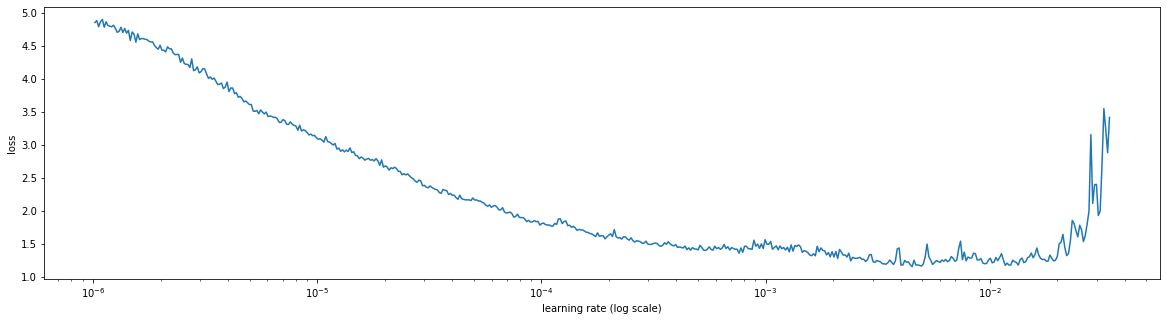

In [ ]:
plt.figure(figsize=(20, 5))
lrfinder.plot_loss(n_skip_beginning=30, n_skip_end=9)

**Learning rate of 1e-3 to 1e-2 seems to be the best learning rate**

In [ ]:
save_run_state(RUN_ID, STATIC_ID)

##### Iteration 2) Stack single channel to 3 channels

In [ ]:
clear_runs('MR_2', True)

In [ ]:
STATIC_ID='MR_2'

In [ ]:
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_2(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=80
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_2()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_2_20210606T0519


In [ ]:
mask_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        4
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LAYERS                         heads
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
MA

In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_2_20210606T0519
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_2_20210606T0519


In [ ]:
#run=initialize_wandb(ID, mask_config)

In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_2_20210606T0519/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

In [ ]:
add_model_results(STATIC_ID)
save_run_state(RUN_ID, STATIC_ID)

##### Iteration 3) Convert the image to RGB

In [ ]:
del model
clear_runs('MR_3', True)

In [ ]:
STATIC_ID='MR_3'

In [ ]:
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_3(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=80
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_3()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_3_20210606T0555


In [ ]:
mask_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        4
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LAYERS                         heads
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
MA

In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_3_20210606T0555
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_3_20210606T0555


In [ ]:
#run=initialize_wandb(ID, mask_config)

In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_3_20210606T0555/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

In [ ]:
add_model_results(STATIC_ID)
save_run_state(RUN_ID, STATIC_ID)

##### Iteration 4) Use Original Image

In [ ]:
STATIC_ID='MR_4'

In [ ]:
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_4(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  IMAGE_SHAPE=[1024,1024,3]
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=80
  IMAGE_MAX_DIM=1024
  IMAGE_MIN_DIM=1024
  RPN_TRAIN_ANCHORS_PER_IMAGE=512
  MINI_MASK_SHAPE=(256, 256)
  MEAN_PIXEL=np.array([510, 286, 522])
  RPN_ANCHOR_SCALES=(32, 64, 128, 256)
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_4()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_4_20210606T0648


In [ ]:
 mask_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        4
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LAYERS                         heads
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.

In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_4_20210606T0648
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_4_20210606T0648


In [ ]:
#run=initialize_wandb(ID, mask_config)

In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_4_20210606T0648/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

In [ ]:
add_model_results(STATIC_ID)
save_run_state(RUN_ID, STATIC_ID)

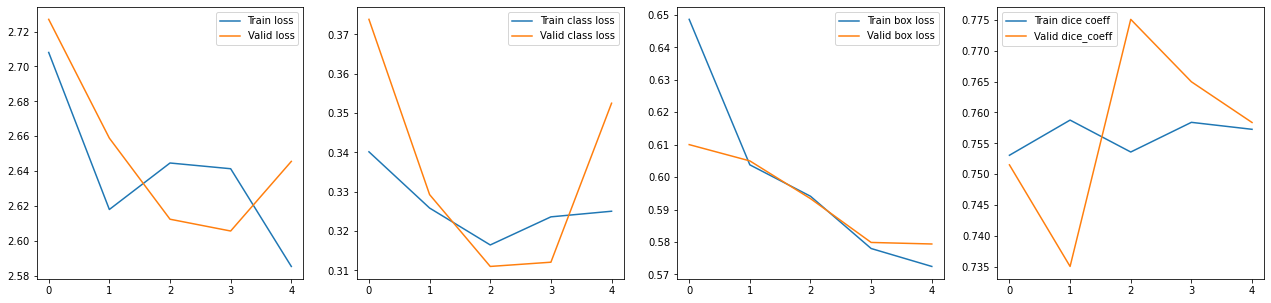

In [ ]:
plot_loss_graph('MR_2')

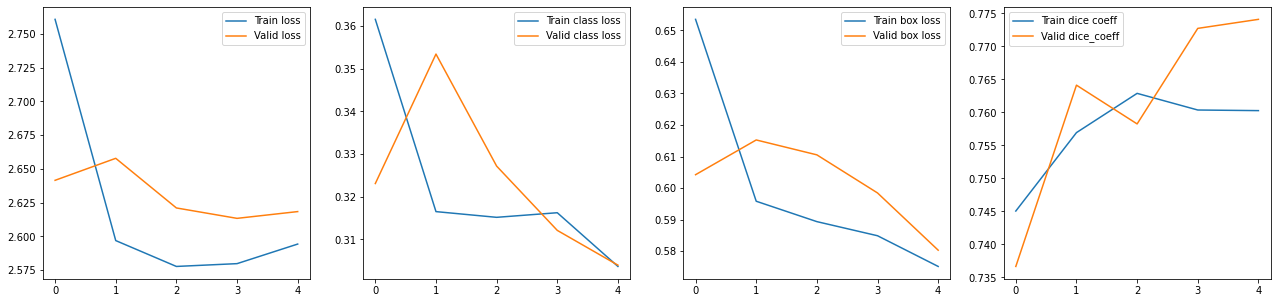

In [ ]:
plot_loss_graph('MR_3')

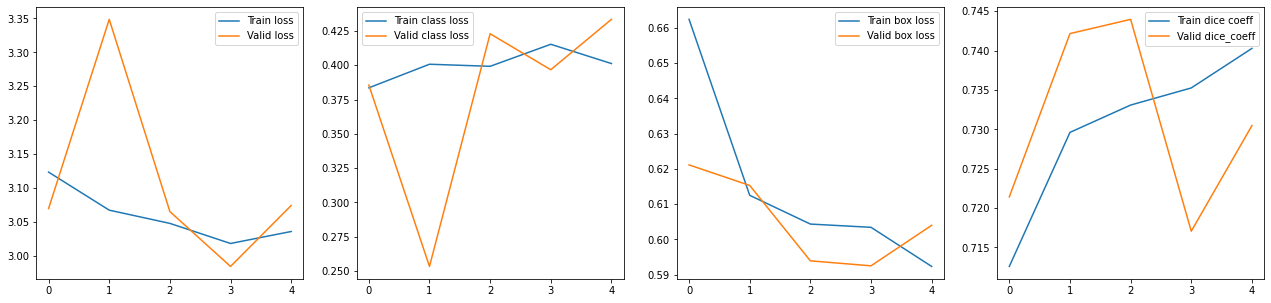

In [ ]:
plot_loss_graph('MR_4')

In [ ]:
add_best_epoch_to_list('MR_2', 'loss', 'min')
add_best_epoch_to_list('MR_3', 'loss', 'min')
add_best_epoch_to_list('MR_4', 'loss', 'min')

**Based on the above execution, there is no significant difference depending on the image sizing. Given the performance trends above, we will proceed with stacking a single channel to 3 channels.**

#### Running Training Iterations 

##### Iteration 5) Heads/SGD/LR=0.001/Batch=8

In [ ]:
STATIC_ID='MR_5'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_5(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=723
  VALIDATION_STEPS=128
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_5()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_5_20210606T0751


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_5_20210606T0751
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_5_20210606T0751


In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_5_20210606T0751/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

In [ ]:
add_model_results('MR_5')
add_best_epoch_to_list('MR_5', 'loss', 'min')
save_run_state(RUN_ID, 'MR_5')

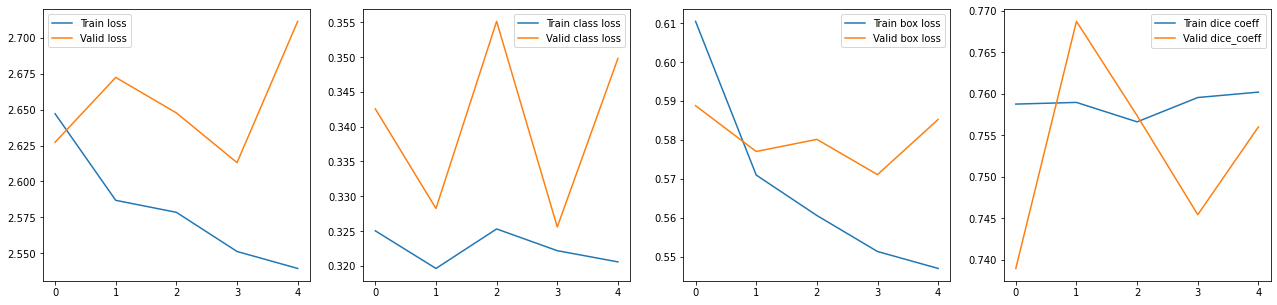

In [ ]:
plot_loss_graph('MR_5')

###### Iteration 5.a) Reduce the LR to 0.0005

In [ ]:
STATIC_ID='MR_5A'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_5a(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.0005
  STEPS_PER_EPOCH=723
  VALIDATION_STEPS=128
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_5a()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_5A_20210606T0927


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_5A_20210606T0927
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_5A_20210606T0927


In [ ]:
weights_path = get_checkpoint_weight_path('MR_5', 5)
reset_weights(ID, model, weights_path)

In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_5A_20210606T0927/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 25

In [ ]:
add_model_results('MR_5A')
add_best_epoch_to_list('MR_5A', 'loss', 'min')
save_run_state(RUN_ID, 'MR_5A')

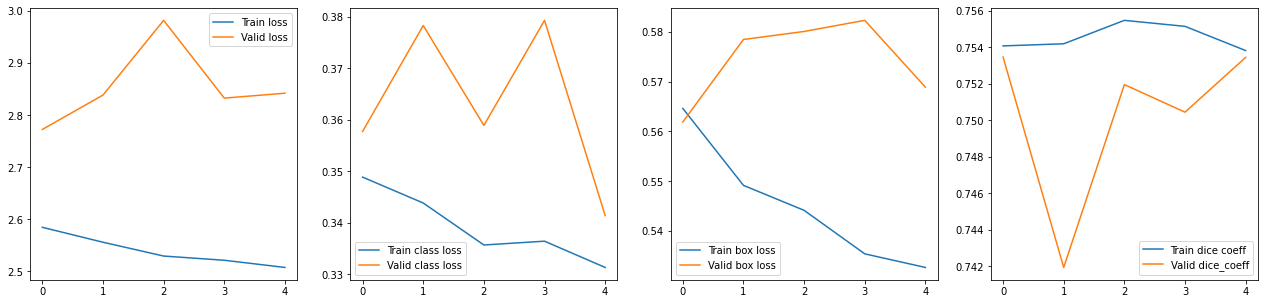

In [ ]:
plot_loss_graph('MR_5A')

##### Iteration 6) Heads/Lamb/LR=0.001/Batch=8

In [ ]:
STATIC_ID='MR_6'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_6(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_6()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_6_20210606T1201


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_6_20210606T1201
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6_20210606T1201


In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6_20210606T1201/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256

In [ ]:
add_model_results('MR_6')
add_best_epoch_to_list('MR_6', 'loss', 'min')
save_run_state(RUN_ID, 'MR_6')

###### Iteration 6.a) Train all layers with LR 0.001

In [ ]:
STATIC_ID='MR_6A'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_6a(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_6a()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_6A_20210606T1216


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_6A_20210606T1216
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6A_20210606T1216


In [ ]:
weights_path = get_checkpoint_weight_path('MR_6', 3)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=6
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6A_20210606T1216/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 25

In [ ]:
add_model_results('MR_6A')
add_best_epoch_to_list('MR_6A', 'loss', 'min')
save_run_state(RUN_ID, 'MR_6A')

###### Iteration 6.b) Train all layers with reduced LR 0.0002

In [ ]:
STATIC_ID='MR_6B'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_6b(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.0002
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_6b()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_6B_20210606T1239


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/logs/maskrcnn/MR_6B_20210606T1239
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6B_20210606T1239


In [ ]:
weights_path = get_checkpoint_weight_path('MR_6A', 5)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=10
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6B_20210606T1239/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 25

In [ ]:
add_model_results('MR_6B')
add_best_epoch_to_list('MR_6B', 'loss', 'min')
save_run_state(RUN_ID, 'MR_6B')

###### Plotting iteration 6 training charts

In [ ]:
merged_history = pd.concat([model_results[iteration_list['MR_6']], 
                  model_results[iteration_list['MR_6A']],
                  model_results[iteration_list['MR_6B']]],ignore_index=True)

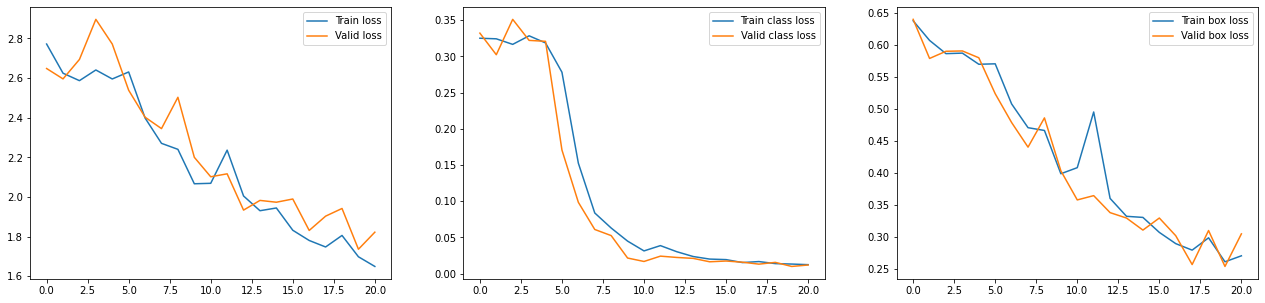

In [ ]:
plot_graph(merged_history)

##### Iteration 7) Heads/SGD/LR=0.001/Batch=8

In [ ]:
STATIC_ID='MR_7'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_7(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_7()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_7_20210612T0813


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_7_20210612T0813
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7_20210612T0813


In [ ]:
EPOCHS=5
with tf.device('/device:GPU:0'):
  hist=model.train(dataset_train,
              dataset_val,
              epochs=EPOCHS,
              augmentation=None) 
  add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7_20210612T0813/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 

In [ ]:
add_model_results('MR_7')
add_best_epoch_to_list('MR_7', 'loss', 'min')
save_run_state(RUN_ID, 'MR_7')

###### Iteration 7.a) Train all layers with LR 0.001

In [ ]:
STATIC_ID='MR_7A'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_7a(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_7a()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_7A_20210612T0828


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_7A_20210612T0828
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7A_20210612T0828


In [ ]:
weights_path = get_checkpoint_weight_path('MR_7', 5)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=6
with tf.device('/device:GPU:0'):
  hist=model.train(dataset_train,
              dataset_val,
              epochs=EPOCHS,
              augmentation=None) 
  add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7A_20210612T0828/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None,

In [ ]:
add_model_results('MR_7A')
add_best_epoch_to_list('MR_7A', 'loss', 'min')
save_run_state(RUN_ID, 'MR_7A')

###### Iteration 7.b) Train all layers with reduced LR 0.0002

In [ ]:
STATIC_ID='MR_7B'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_7b(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='SGD'
  LEARNING_RATE=0.0002
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'dice_coeff': 1.0}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_7b()
ID=get_iteration_id(STATIC_ID)
optimizer = tf.keras.optimizers.SGD(lr=mask_config.LEARNING_RATE, momentum=mask_config.LEARNING_MOMENTUM, clipnorm=mask_config.GRADIENT_CLIP_NORM)

Iteration Id: MR_7B_20210612T0850


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_7B_20210612T0850
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7B_20210612T0850


In [ ]:
weights_path = get_checkpoint_weight_path('MR_7A', 5)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=10
with tf.device('/device:GPU:0'):
  hist=model.train(dataset_train,
              dataset_val,
              epochs=EPOCHS,
              augmentation=None) 
  add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_7B_20210612T0850/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None,

In [ ]:
add_model_results('MR_7B')
add_best_epoch_to_list('MR_7B', 'loss', 'min')
save_run_state(RUN_ID, 'MR_7B')

###### Plotting itertion 7 training charts

In [ ]:
merged_history = pd.concat([model_results[iteration_list['MR_7']], 
                  model_results[iteration_list['MR_7A']],
                  model_results[iteration_list['MR_7B']]],ignore_index=True)

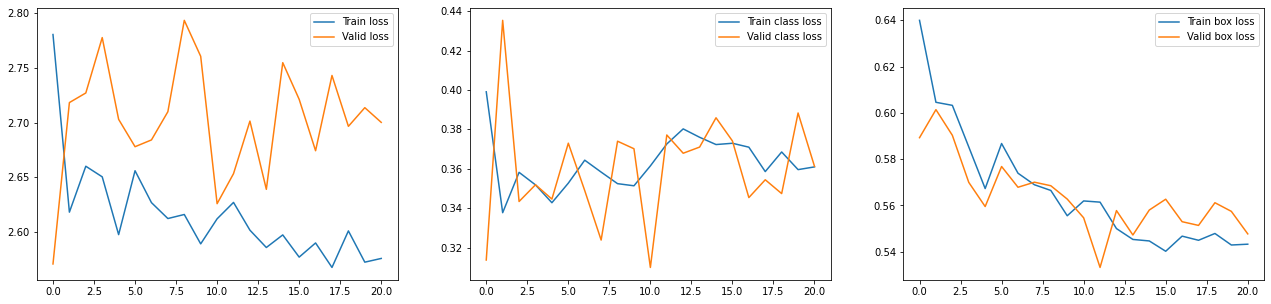

In [ ]:
plot_graph(merged_history)

##### Iteration 8) Heads/Lamb/LR=0.001/Batch=8

In [ ]:
STATIC_ID='MR_8'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_8(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 0., 'dice_coeff': 0.}
  LAYERS='heads'

In [ ]:
# Config time settings - Cannot be changed at runtime.
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_8()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_8_20210612T1234


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_8_20210612T1234
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8_20210612T1234


In [ ]:
EPOCHS=5
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8_20210612T1234/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 

In [ ]:
add_model_results('MR_8')
add_best_epoch_to_list('MR_8', 'loss', 'min')
save_run_state(RUN_ID, 'MR_8')

###### Iteration 8.a) Train all layers with LR 0.001

In [ ]:
K.clear_session()
STATIC_ID='MR_8A'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_8a(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.001
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 0., 'dice_coeff': 0.}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_8a()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_8A_20210612T1249


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_8A_20210612T1249
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8A_20210612T1249


In [ ]:
weights_path = get_checkpoint_weight_path('MR_8', 5)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=6
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8A_20210612T1249/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None,

In [ ]:
add_model_results('MR_8A')
add_best_epoch_to_list('MR_8A', 'loss', 'min')
save_run_state(RUN_ID, 'MR_8A')

###### Iteration 8.b) Train all layers with reduced LR 0.0002

In [ ]:
STATIC_ID='MR_8B'
load_prior_run_state(RUN_ID, STATIC_ID)

In [ ]:
class MaskConfig_8b(MaskRCnnConfig):
  IMAGES_PER_GPU=8
  OPTIMIZER='Lamb'
  LEARNING_RATE=0.0002
  STEPS_PER_EPOCH=200
  VALIDATION_STEPS=50
  LOSS_WEIGHTS={'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 0., 'dice_coeff': 0.}
  LAYERS='all'

In [ ]:
# Config time settings - Cannot be changed at runtime.
mask_config = MaskConfig_8b()
ID=get_iteration_id(STATIC_ID)
optimizer = LAMB(learning_rate = mask_config.LEARNING_RATE)

Iteration Id: MR_8B_20210612T1428


In [ ]:
model = get_nn_model(STATIC_ID, mask_config, optimizer)
print('Log directory:', model.log_dir)
print('Checkpoint directory:', model.checkpoint_dir)

Selecting layers to train
Log directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/logs/maskrcnn/MR_8B_20210612T1428
Checkpoint directory: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8B_20210612T1428


In [ ]:
weights_path = get_checkpoint_weight_path('MR_8A', 6)
model=reset_weights(ID, model, weights_path)
model_list[iteration_list[STATIC_ID]]= model

In [ ]:
EPOCHS=10
hist=model.train(dataset_train,
            dataset_val,
            epochs=EPOCHS,
            augmentation=None) 
add_history_to_list(STATIC_ID, model.keras_model.history.history)

Checkpoint Path: /content/drive/MyDrive/Colab/CapstoneProject/dataset/data/checkpoint/maskrcnn/MR_8B_20210612T1428/maskrcnn_{epoch:04d}.h5
Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None,

In [ ]:
add_model_results('MR_8B')
add_best_epoch_to_list('MR_8B', 'loss', 'min')
save_run_state(RUN_ID, 'MR_8B')

###### Plotting iteration 8 training charts

In [ ]:
merged_history = pd.concat([model_results[iteration_list['MR_6']], 
                  model_results[iteration_list['MR_6A']],
                  model_results[iteration_list['MR_6B']]],ignore_index=True)

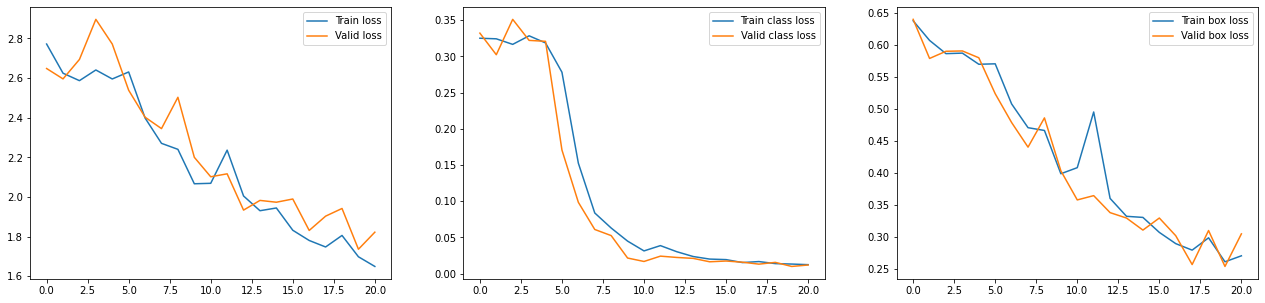

In [ ]:
plot_graph(merged_history)

**Observation:**
Based on the above iterations - Iteration 6 has performed better. LAMB optimizer has performed better than SGD. There was a gradual reduction in loss in case of LAMB with lowest loss = 1.64. There is better convergence in iteration 6 compared to others. Hence we will progress with 6B model as the model for evaluation

### 5) Model Evaluation

#### 1) Test utility functions

In [ ]:
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

In [ ]:
def compute_dice_coeff(masks1, masks2):
  # If either set of masks is empty return empty result
  if masks1.shape[-1] == 0 or masks2.shape[-1] == 0:
      return np.zeros((masks1.shape[-1], masks2.shape[-1]))
  # flatten masks and compute their areas
  masks1 = np.reshape(masks1 > .5, (-1, masks1.shape[-1])).astype(np.float32)
  masks2 = np.reshape(masks2 > .5, (-1, masks2.shape[-1])).astype(np.float32)
  area1 = np.sum(masks1, axis=0)
  area2 = np.sum(masks2, axis=0)

  # intersections and union
  intersections = np.dot(masks1.T, masks2)
  union = area1[:, None] + area2[None, :]
  dice_coeff = 2 * intersections / union
  return dice_coeff

In [ ]:
def compute_iou(masks1, masks2):
    """Computes IoU overlaps between two sets of masks.
    masks1, masks2: [Height, Width, instances]
    """
    
    # If either set of masks is empty return empty result
    if masks1.shape[-1] == 0 or masks2.shape[-1] == 0:
        return np.zeros((masks1.shape[-1], masks2.shape[-1]))
    # flatten masks and compute their areas
    masks1 = np.reshape(masks1 > .5, (-1, masks1.shape[-1])).astype(np.float32)
    masks2 = np.reshape(masks2 > .5, (-1, masks2.shape[-1])).astype(np.float32)
    area1 = np.sum(masks1, axis=0)
    area2 = np.sum(masks2, axis=0)

    # intersections and union
    intersections = np.dot(masks1.T, masks2)
    union = area1[:, None] + area2[None, :] - intersections
    overlaps = intersections / union
    return overlaps

In [ ]:
def compute_overlaps_boxes(boxes1, boxes2):
  def compute_iou_boxes(box, boxes, box_area, boxes_area):
    """Calculates IoU of the given box with the array of the given boxes.
    box: 1D vector [y1, x1, y2, x2]
    boxes: [boxes_count, (y1, x1, y2, x2)]
    box_area: float. the area of 'box'
    boxes_area: array of length boxes_count.

    Note: the areas are passed in rather than calculated here for
    efficiency. Calculate once in the caller to avoid duplicate work.
    """
    # Calculate intersection areas
    y1 = np.maximum(box[0], boxes[:, 0])
    y2 = np.minimum(box[2], boxes[:, 2])
    x1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[3], boxes[:, 3])
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    union = box_area + boxes_area[:] - intersection[:]
    iou = intersection / union
    return iou
  
  area1 = (boxes1[:, 2] - boxes1[:, 0]) * (boxes1[:, 3] - boxes1[:, 1])
  area2 = (boxes2[:, 2] - boxes2[:, 0]) * (boxes2[:, 3] - boxes2[:, 1])

  # Compute overlaps to generate matrix [boxes1 count, boxes2 count]
  # Each cell contains the IoU value.
  overlaps = np.zeros((boxes1.shape[0], boxes2.shape[0]))
  for i in range(overlaps.shape[1]):
      box2 = boxes2[i]
      overlaps[:, i] = compute_iou_boxes(box2, boxes1, area2[i], area1)
  return overlaps

In [ ]:
def evaluate_model(model):
  j=0
  dice_array=[]
  iou_array=[]
  for image_id in dataset_test.image_ids:
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
          modellib.load_image_gt(dataset_test, maskrcnn_infer_config, 
                                image_id)
    results = model.detect([original_image], verbose=0)
    r = results[0]
    gt_index = np.where(gt_class_id == 1)
    if gt_index[0].size == 0:
      dc=None
      iou=None
    else:
      if not len(r['masks']) == 0:
        dc = compute_dice_coeff(gt_mask, r['masks'])
        iou = compute_iou(gt_mask, r['masks'])
        dc = dc.flatten()
        iou = iou.flatten()
        dc = np.sum(dc[np.nonzero(dc)])/(len(np.nonzero(dc)))
        iou = np.sum(iou[np.nonzero(iou)])/(len(np.nonzero(iou)))
      else:
          dc = 0
          iou = 0
    if not dc is None:
      dice_array.append(dc)
    if not iou is None:
      iou_array.append(iou)
    j += 1
  return dice_array, iou_array

In [ ]:
def get_infer_config(static_id, detection_cofidence=0.75, metric='loss', mtype='min'):
  best_epoch = get_best_epoch(static_id, metric, mtype)
  weights_path = get_checkpoint_weight_path(static_id, best_epoch.index[0]+1)
  infer_config = InferenceConfig()
  infer_config.DETECTION_MIN_CONFIDENCE=detection_cofidence
  infer_config.TESTING_WEIGHTS = weights_path
  return infer_config

In [ ]:
def get_infer_model(static_id, metric='loss', mtype='min', detection_confidence=0.75):
  infer_config = get_infer_config(static_id, detection_confidence, metric, mtype)
  model=create_inference_maskmodel(static_id, infer_config)
  return model

#### 2) Testing Evaluation

In [ ]:
load_state(RUN_ID, 'MR_6B')

In [ ]:
model = get_infer_model('MR_6B', 'val_loss', 'min', 0.85)
dice_array, iou_array = evaluate_model(model)

In [ ]:
print("Testing performance")
print ("===============================")
print ("Dice coefficient:", str(round(np.mean(dice_array),2)))
print ("IoU:", str(round(np.mean(iou_array),2)))

Testing performance
Dice coefficient: 0.77
IoU: 0.55


In [ ]:
model = get_infer_model('MR_8B', 'loss', 'min', 0.85)
dice_array, iou_array = evaluate_model(model)

In [ ]:
print("Testing performance")
print ("===============================")
print ("Dice coefficient:", str(round(np.mean(dice_array),2)))
print ("IoU:", str(round(np.mean(iou_array),2)))

Testing performance
Dice coefficient: 0.41
IoU: 0.25


#### 3) Visualize Predictions

In [ ]:
def visualize_images(test_with_id, det_conf):
  model = get_infer_model(test_with_id, 'loss', 'min',det_conf)

  fig = plt.figure(figsize=(10, 30))
  for j in range(6):
    image_id = random.choice(dataset_test.image_ids)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
          modellib.load_image_gt(dataset_test, maskrcnn_infer_config, 
                                image_id)
    plt.subplot(6, 2, (j*2+1))
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                                  dataset_test.class_names,
                                  colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])
    plt.subplot(6, 2, (j*2+2))
    results = model.detect([original_image], verbose=0)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                  dataset_test.class_names, r['scores'], 
                                  colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])
    


/content/drive/MyDrive/Colab/CapstoneProject/dataset/checkpoint/maskrcnn/MR_6B_20210606T1239/maskrcnn_0010.h5

*** No instances to display *** 



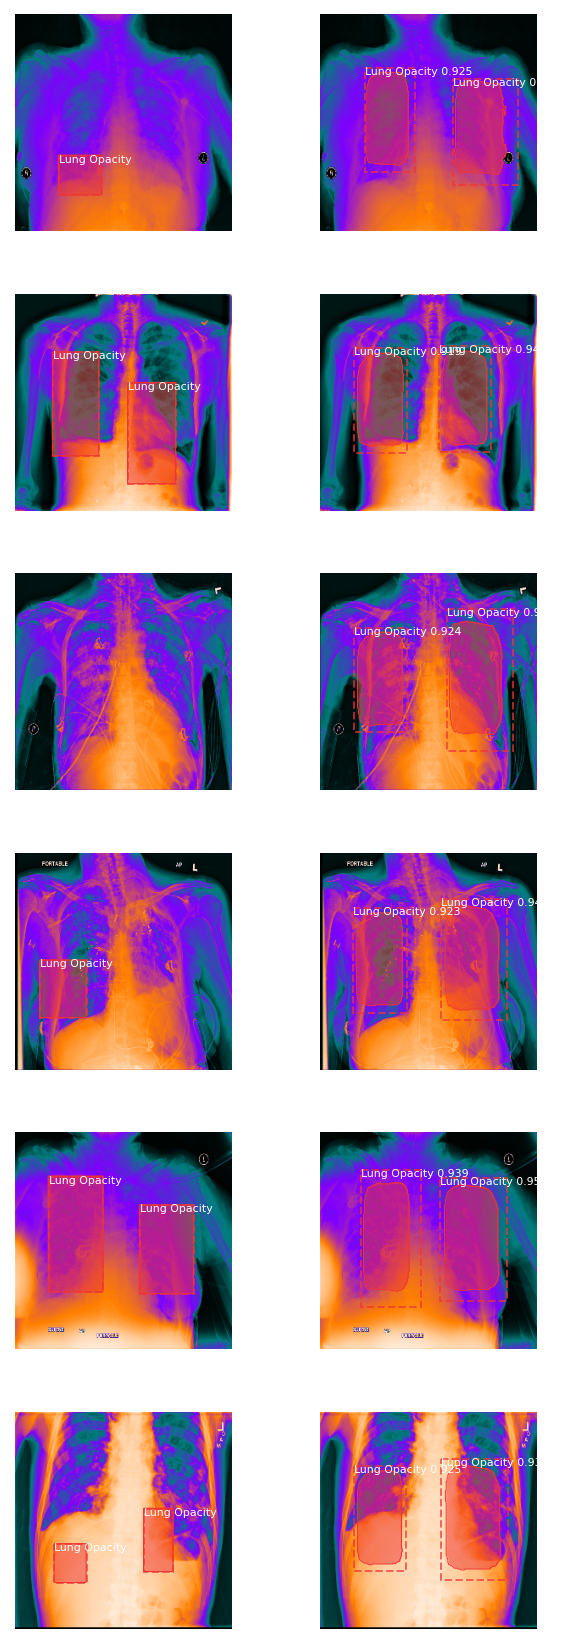

In [ ]:
visualize_images('MR_6B', 0.85)

# References
@Project Github URL

https://github.com/amenaria/Capstone-Project-aiml/tree/master


Notebook URL -
https://github.com/amenaria/Capstone-Project-aiml/blob/master/Final_Report_Submission_Capstone_Project_Computer_Vision_Pneumonia_Detection_Challenge_MaskRCNN.ipynb

